# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Telegram_1.csv")
df.head()

,userName,score,at,content
0,Virgiawan setya,1,2024-04-26 17:36:55,Gak iso login
1,Fery Nurjaya,1,2024-04-25 17:55:22,Elor terus
2,Sann Preset,3,2024-04-25 17:53:07,"sekarang login gabisa, selalu eror"
3,Kaca Mata Elang,1,2024-04-25 17:43:30,Menurut aq dari dulu sampai sekarang masih ban...
4,Kevin Kamarullah,1,2024-04-25 17:42:12,"Aplikasi ga jelas, udah masukin email, masukin..."


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Gak iso login,Virgiawan setya,2024-04-26 17:36:55
1,Elor terus,Fery Nurjaya,2024-04-25 17:55:22
2,"sekarang login gabisa, selalu eror",Sann Preset,2024-04-25 17:53:07
3,Menurut aq dari dulu sampai sekarang masih ban...,Kaca Mata Elang,2024-04-25 17:43:30
4,"Aplikasi ga jelas, udah masukin email, masukin...",Kevin Kamarullah,2024-04-25 17:42:12
...,...,...,...
592,"gabisa login, error mulu",Indra Lesmana,2024-04-21 17:59:54
593,Ini kenapa ya tiap mau chat suka ke pending. P...,yukko mi,2024-04-21 17:22:21
594,good,Edi Wahyu,2024-04-21 17:15:47
595,Mantap,Bano Rumbano,2024-04-21 17:11:11


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,502,597,596
top,Very good,Virgiawan setya,2024-04-23 11:13:36
freq,16,1,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(502, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,gak iso login,Virgiawan setya,2024-04-26 17:36:55
1,elor terus,Fery Nurjaya,2024-04-25 17:55:22
2,sekarang login gabisa selalu eror,Sann Preset,2024-04-25 17:53:07
3,menurut aq dari dulu sampai sekarang masih ban...,Kaca Mata Elang,2024-04-25 17:43:30
4,aplikasi ga jelas udah masukin email masukin k...,Kevin Kamarullah,2024-04-25 17:42:12
...,...,...,...
591,saya baru memulai nya,Brigi Leoval,2024-04-21 18:21:52
592,gabisa login error mulu,Indra Lesmana,2024-04-21 17:59:54
593,ini kenapa ya tiap mau chat suka ke pending pa...,yukko mi,2024-04-21 17:22:21
594,good,Edi Wahyu,2024-04-21 17:15:47


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,tidak iso login,Virgiawan setya,2024-04-26 17:36:55
1,error terus,Fery Nurjaya,2024-04-25 17:55:22
2,sekarang login gabisa selalu eror,Sann Preset,2024-04-25 17:53:07
3,menurut aq dari dulu sampai sekarang masih ban...,Kaca Mata Elang,2024-04-25 17:43:30
4,aplikasi ga jelas udah masukin email masukin k...,Kevin Kamarullah,2024-04-25 17:42:12
...,...,...,...
591,saya baru memulai nya,Brigi Leoval,2024-04-21 18:21:52
592,gabisa login error mulu,Indra Lesmana,2024-04-21 17:59:54
593,ini kenapa ya tiap mau chat suka ke pending pa...,yukko mi,2024-04-21 17:22:21
594,good,Edi Wahyu,2024-04-21 17:15:47


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,iso login,Virgiawan setya,2024-04-26 17:36:55
1,error terus,Fery Nurjaya,2024-04-25 17:55:22
2,sekarang login gabisa selalu eror,Sann Preset,2024-04-25 17:53:07
3,aq dulu sekarang banyak kurangnya sihh andai k...,Kaca Mata Elang,2024-04-25 17:43:30
4,aplikasi ga jelas udah masukin email masukin k...,Kevin Kamarullah,2024-04-25 17:42:12
...,...,...,...
591,baru memulai nya,Brigi Leoval,2024-04-21 18:21:52
592,gabisa login error mulu,Indra Lesmana,2024-04-21 17:59:54
593,kenapa tiap mau chat suka pending padahal siny...,yukko mi,2024-04-21 17:22:21
594,good,Edi Wahyu,2024-04-21 17:15:47


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                           [iso, login]
1                                         [error, terus]
2                [sekarang, login, gabisa, selalu, eror]
3      [aq, dulu, sekarang, banyak, kurangnya, sihh, ...
4      [aplikasi, ga, jelas, udah, masukin, email, ma...
                             ...                        
591                                 [baru, memulai, nya]
592                         [gabisa, login, error, mulu]
593    [kenapa, tiap, mau, chat, suka, pending, padah...
594                                               [good]
596                                             [lancar]
Name: content, Length: 502, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Telegram_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Telegram_1.csv', encoding = 'latin1')
df_clean

,content
0,iso login
1,error terus
2,sekarang login gabisa selalu eror
3,aq dulu sekarang banyak kurang sihh andai kata...
4,aplikasi ga jelas udah masukin email masukin k...
...,...
497,baru mulai nya
498,gabisa login error mulu
499,kenapa tiap mau chat suka pending padahal siny...
500,good


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Telegram_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 9.83MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,iso login
1,error terus
2,sekarang login gabisa selalu eror
3,aq dulu sekarang banyak kurang sihh andai kata...
4,aplikasi ga jelas udah masukin email masukin k...
...,...
497,baru mulai nya
498,gabisa login error mulu
499,kenapa tiap mau chat suka pending padahal siny...
500,good


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Telegram_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Telegram_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,iso login,iso login
1,1,error terus,continued error
2,2,sekarang login gabisa selalu eror,Now login can't always be error
3,3,aq dulu sekarang banyak kurang sihh andai kata...,"fontcolor="" # FFFF00""aq fontcolor="" # FFFF00"" ..."
4,4,aplikasi ga jelas udah masukin email masukin k...,The application didn't make it clear that the ...
...,...,...,...
497,497,baru mulai nya,Just getting started.
498,498,gabisa login error mulu,can't login mulu error
499,499,kenapa tiap mau chat suka pending padahal siny...,Why does everyone want to chat when the signal...
500,500,good,good


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Telegram_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,iso login,iso login
1,1,error terus,continued error
2,2,sekarang login gabisa selalu eror,Now login can't always be error
3,3,aq dulu sekarang banyak kurang sihh andai kata...,"fontcolor="" # FFFF00""aq fontcolor="" # FFFF00"" ..."
4,4,aplikasi ga jelas udah masukin email masukin k...,The application didn't make it clear that the ...
...,...,...,...
497,497,baru mulai nya,Just getting started.
498,498,gabisa login error mulu,can't login mulu error
499,499,kenapa tiap mau chat suka pending padahal siny...,Why does everyone want to chat when the signal...
500,500,good,good


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 226
Netral = 192
Negatif = 84

Total Data Seluruhnya : 502


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,iso login,iso login,Netral
1,1,error terus,continued error,Netral
2,2,sekarang login gabisa selalu eror,Now login can't always be error,Netral
3,3,aq dulu sekarang banyak kurang sihh andai kata...,"fontcolor="" # FFFF00""aq fontcolor="" # FFFF00"" ...",Positif
4,4,aplikasi ga jelas udah masukin email masukin k...,The application didn't make it clear that the ...,Positif
...,...,...,...,...
497,497,baru mulai nya,Just getting started.,Netral
498,498,gabisa login error mulu,can't login mulu error,Netral
499,499,kenapa tiap mau chat suka pending padahal siny...,Why does everyone want to chat when the signal...,Positif
500,500,good,good,Positif


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,iso login,iso login,Netral
1,error terus,continued error,Netral
2,sekarang login gabisa selalu eror,Now login can't always be error,Netral
3,aq dulu sekarang banyak kurang sihh andai kata...,"fontcolor="" # FFFF00""aq fontcolor="" # FFFF00"" ...",Positif
4,aplikasi ga jelas udah masukin email masukin k...,The application didn't make it clear that the ...,Positif
...,...,...,...
497,baru mulai nya,Just getting started.,Netral
498,gabisa login error mulu,can't login mulu error,Netral
499,kenapa tiap mau chat suka pending padahal siny...,Why does everyone want to chat when the signal...,Positif
500,good,good,Positif


# **Visualisasi**


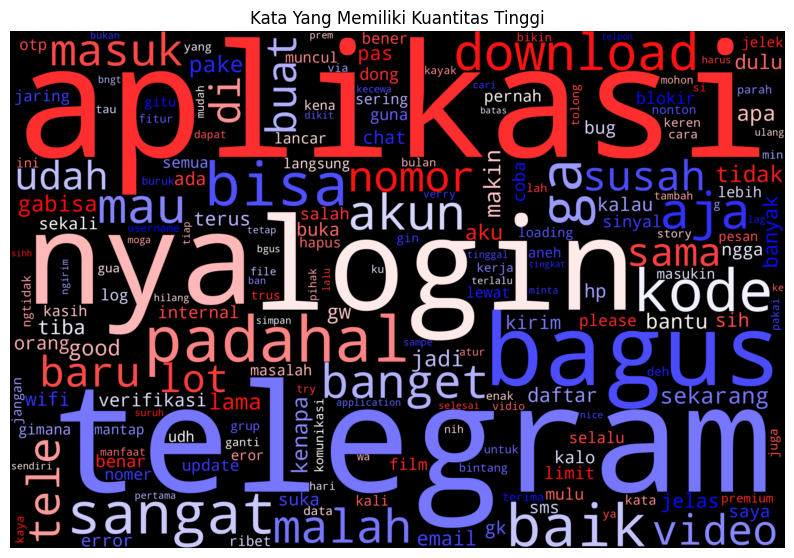

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


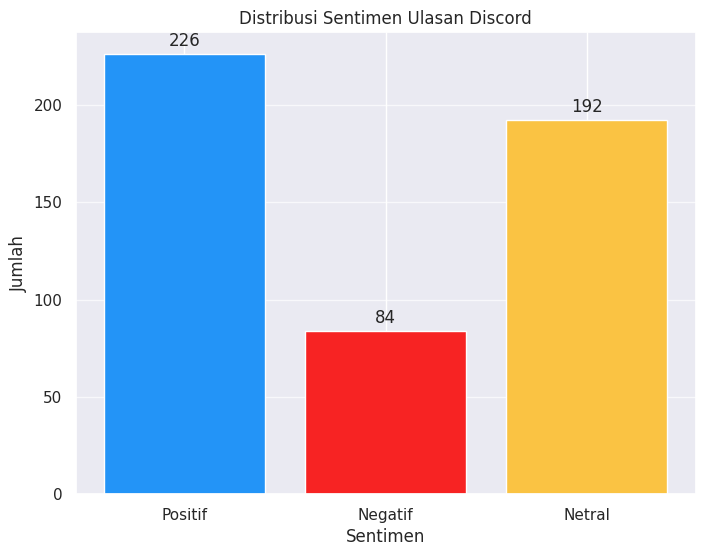

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [38]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
3,aq dulu sekarang banyak kurang sihh andai kata...,"fontcolor="" # FFFF00""aq fontcolor="" # FFFF00"" ...",Positif
4,aplikasi ga jelas udah masukin email masukin k...,The application didn't make it clear that the ...,Positif
5,di baik beranda kosong,on both empty porches,Negatif
8,good,good,Positif
9,vidio saya unduh tiba2 sering hilang sekarang ...,My vidio downloads are all of a sudden lost. N...,Positif
...,...,...,...
494,we mau mindahin akun telegram hp baru g karena...,We're going to send you a telegram. It's not l...,Positif
496,aman akun,account secure,Positif
499,kenapa tiap mau chat suka pending padahal siny...,Why does everyone want to chat when the signal...,Positif
500,good,good,Positif


In [39]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
3,aq dulu sekarang banyak kurang sihh andai kata...,"fontcolor="" # FFFF00""aq fontcolor="" # FFFF00"" ...",1
4,aplikasi ga jelas udah masukin email masukin k...,The application didn't make it clear that the ...,1
5,di baik beranda kosong,on both empty porches,0
8,good,good,1
9,vidio saya unduh tiba2 sering hilang sekarang ...,My vidio downloads are all of a sudden lost. N...,1
...,...,...,...
494,we mau mindahin akun telegram hp baru g karena...,We're going to send you a telegram. It's not l...,1
496,aman akun,account secure,1
499,kenapa tiap mau chat suka pending padahal siny...,Why does everyone want to chat when the signal...,1
500,good,good,1


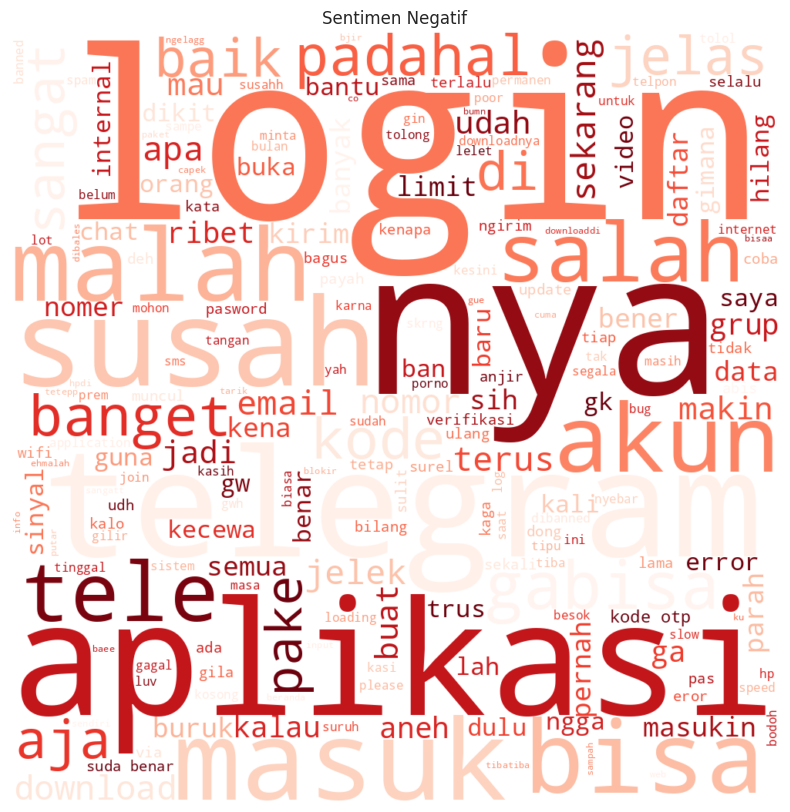

In [40]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

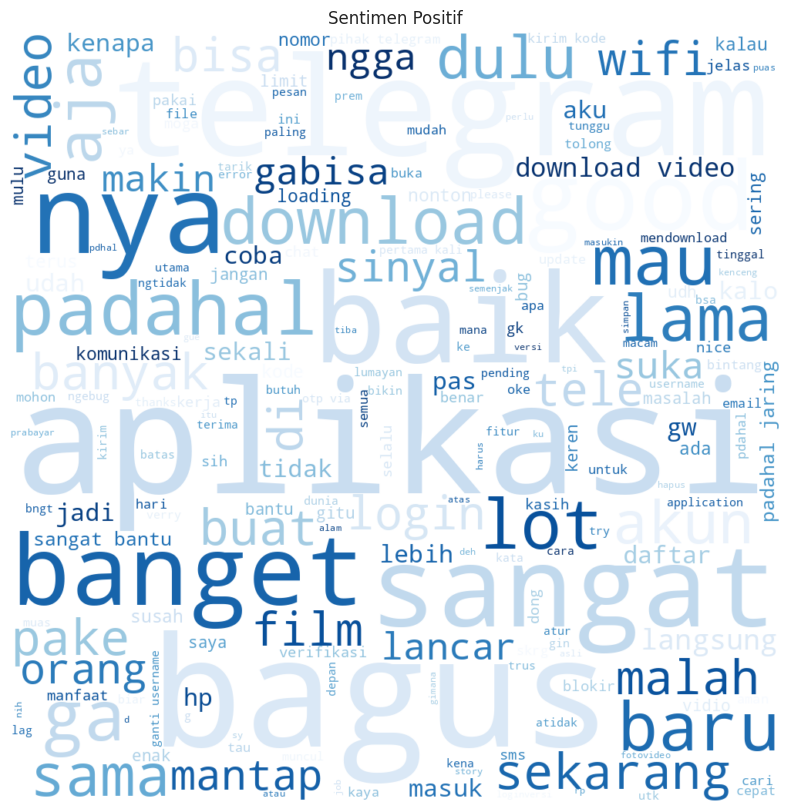

In [41]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [42]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    226
0     84
Name: count, dtype: int64

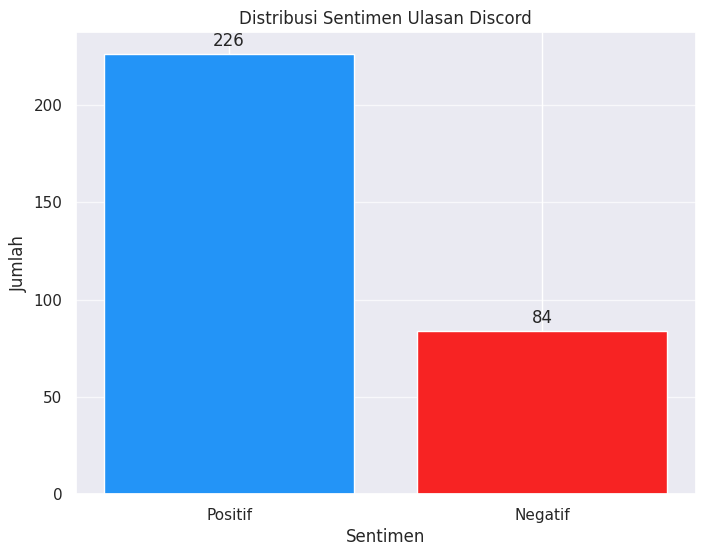

In [43]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [47]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

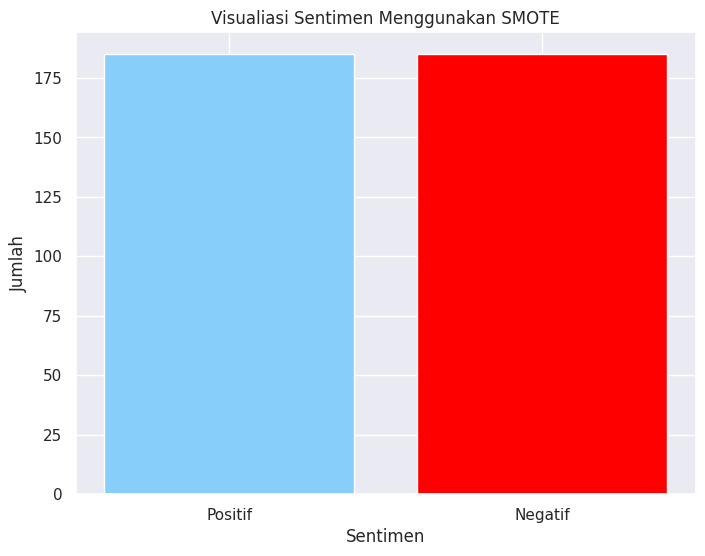

In [48]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [49]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [50]:
y_pred = naive_bayes.predict(X_test_vec)

In [51]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7580645161290323

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.64      0.67      0.65        21
     Positif       0.82      0.80      0.81        41

    accuracy                           0.76        62
   macro avg       0.73      0.74      0.73        62
weighted avg       0.76      0.76      0.76        62



# **Testing**


In [52]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : kecewa bgt sama aplikasinya
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [53]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : mantap
Hasil Analisis Sentimen Untuk Teks Baru : Positif
